In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [31]:

# Load the two matrices (replace with your actual filenames)
matrix1 = pd.read_csv('../TP53_wt_Zn2/data_wt_Zn2/Pyinteraph/df_SB_matrix.csv', index_col=0)
matrix2 = pd.read_csv('../TP53_y220p1_Zn2/data_y220p1_Zn2/Pyinteraph/df_SB_matrix.csv', index_col=0)

# Subtract matrix2 from matrix1 (matrix1 - matrix2)
difference_matrix = matrix1 - matrix2

def plot_heatmap(difference_matrix):    # Plot the heatmap with a red-blue color scheme
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        difference_matrix, 
        cmap='coolwarm',  # Red to blue colormap
        center=0,         # Center at zero for balanced color scaling
        linewidths=0,   # Linewidth between cells
        square=False,     # Keep the aspect ratio adjustable
        linecolor='white',# Color of the lines separating cells
        cbar_kws={"label": "Difference in Occupancy"}
    )

    # Set plot labels and title
    plt.title("Difference Heatmap: WT - Y220C")
    plt.xlabel("Residue Index")
    plt.ylabel("Residue Index")

    # Show the plot
    plt.show()

#plot_heatmap(difference_matrix)

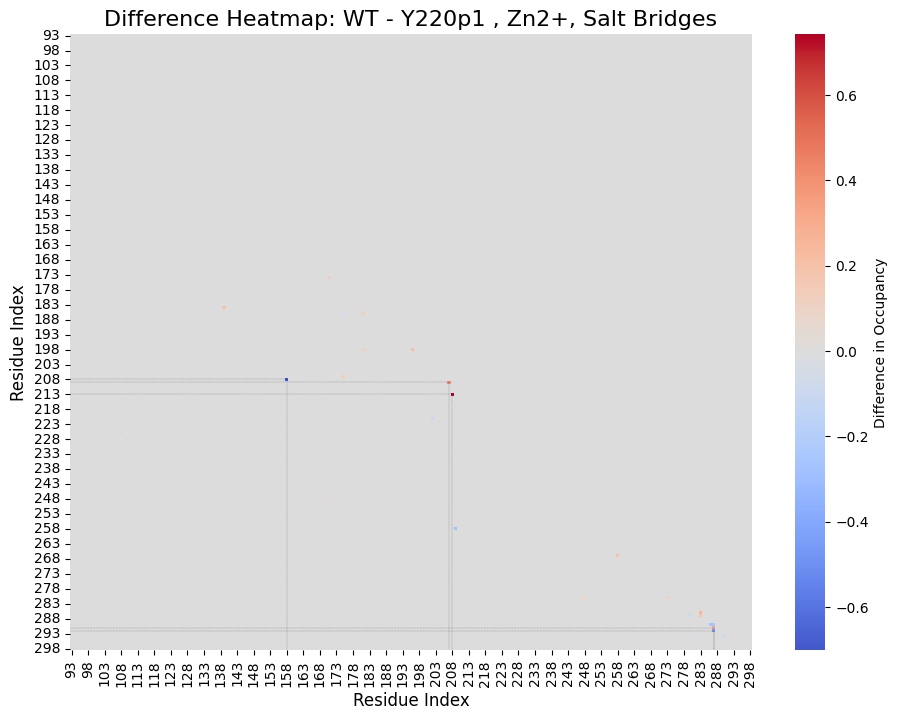

In [32]:

plt.figure(figsize=(11, 8))  # Adjust the figure size to make the points larger
# Plot the heatmap with a red-blue color scheme
sns.heatmap(
    difference_matrix, 
    cmap='coolwarm',  # Red to blue colormap
    center=0,         # Center at zero for balanced color scaling
    annot=False,      # Don't show numeric values in cells
    linecolor='white',# Color of the lines separating cells
    cbar_kws={"label": "Difference in Occupancy"},
    square=False,     # Keep the aspect ratio adjustable
)

# Set the background color of the plot and the axes
plt.gcf().set_facecolor('white')  # Set the figure background to white
plt.gca().set_facecolor('white')  # Set the axes background to white

# Identify cells with values above 0.2 or below -0.2
for i in range(difference_matrix.shape[0]):
    for j in range(difference_matrix.shape[1]):
        value = difference_matrix.iloc[i, j]
        
        # Check if the value is greater than 0.2 or less than -0.2
        if value > 0.3 or value < -0.3:
            # Draw a dotted line from the point to the x-axis (vertical line)
            plt.plot([j + 0.5, j + 0.5], [i + 0.5, difference_matrix.shape[0]], 'k:', lw=0.2)  # Thinner line and bottom            
            # Draw a dotted line from the point to the y-axis (horizontal line)
            plt.plot([j + 0.5, 0], [i + 0.5, i + 0.5], 'k:', lw=0.2)  # Horizontal line

# Set plot labels and title
plt.title("Difference Heatmap: WT - Y220p1 , Zn2+, Salt Bridges", fontsize=16)
plt.xlabel("Residue Index", fontsize=12)
plt.ylabel("Residue Index", fontsize=12)

# Show the plot
#plt.show()
plt.savefig("WT_220p1_SB_Zn2")
